In [1]:
import scanpy as sc
import scvi
import matplotlib.pyplot as plt
import numpy as np

## MGH66_untreated

In [3]:
#load untreated data
rep1 = sc.read_csv('/work/DPDS/s237348/scRNAseq-Pipeline/GSE180237_RAW/MGH66_untreated_rep1.tsv', delimiter='\t').T
rep2 = sc.read_csv('/work/DPDS/s237348/scRNAseq-Pipeline/GSE180237_RAW/MGH66_untreated_rep2.tsv', delimiter='\t').T
# a_data.obs = cell barcodes
# a_data.var = genes

In [4]:
rep1d=rep1.copy()
rep2d=rep2.copy()

#### QC

In [5]:
sc.pp.calculate_qc_metrics(rep1d, inplace=True)
rep1_ranked_counts = rep1d.obs['total_counts'].sort_values(ascending=False).values

sc.pp.calculate_qc_metrics(rep2d, inplace=True)
rep2_ranked_counts = rep2d.obs['total_counts'].sort_values(ascending=False).values

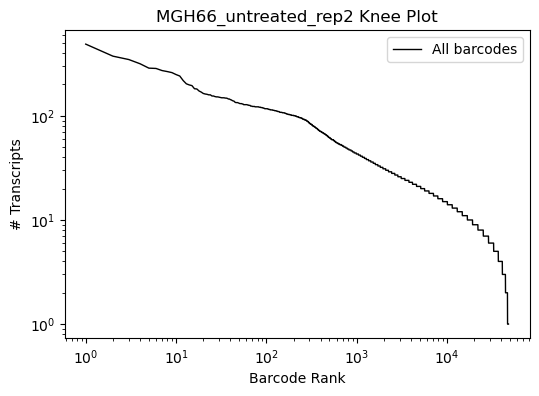

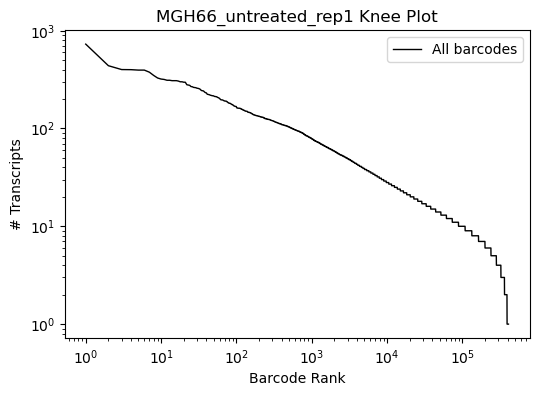

In [6]:
#knee plots
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(len(rep2_ranked_counts))+1, rep2_ranked_counts, color='black', linewidth=1)

# num_cells = 3000
# ax.plot(np.arange(num_cells) + 1, ranked_counts[:num_cells], color='green', linewidth=2)
# ax.plot(num_cells, ranked_counts[num_cells-1], marker='*', markersize=15, color='lime', zorder=5)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Barcode Rank')
ax.set_ylabel('# Transcripts')
ax.set_title('MGH66_untreated_rep2 Knee Plot')
ax.legend(['All barcodes', 'Cells'], loc='upper right')

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(len(rep1_ranked_counts))+1, rep1_ranked_counts, color='black', linewidth=1)

# num_cells = 3000
# ax.plot(np.arange(num_cells) + 1, ranked_counts[:num_cells], color='green', linewidth=2)
# ax.plot(num_cells, ranked_counts[num_cells-1], marker='*', markersize=15, color='lime', zorder=5)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Barcode Rank')
ax.set_ylabel('# Transcripts')
ax.set_title('MGH66_untreated_rep1 Knee Plot')
ax.legend(['All barcodes', 'Cells'], loc='upper right')

plt.show()

In [6]:
sc.pp.filter_genes(adata, min_cells=10) # genes found in at least 10 cells
sc.pp.filter_cells(adata, min_genes=10) # cells with at least 10 genes

In [ ]:
#remove doublets
sc.pp.scrublet(adata)

/home2/s237348/miniconda3/envs/scRNAseq/lib/python3.13/site-packages/legacy_api_wrap/__init__.py:82: UserWarning: Some cells have zero counts
  return fn(*args_all, **kw)
/home2/s237348/miniconda3/envs/scRNAseq/lib/python3.13/site-packages/legacy_api_wrap/__init__.py:82: UserWarning: Some cells have zero counts
  return fn(*args_all, **kw)


In [12]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True, flavor='seurat_v3') #top 2000 highly variable genes

## Meropenem

In [7]:
mero = sc.read_csv('/work/OSPH/s237348/scRNAseq-Pipeline/GSE180237_RAW/MGH66_meropenem_rep1.tsv', delimiter='\t').T
mero_c = mero.copy()

In [ ]:
sc.pp.calculate_qc_metrics(mero_c, inplace=True)